In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import skew
from scipy.stats import zscore



# Loading Boston Dataset

In [3]:
df=pd.read_csv("Boston_with_null_values.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
missing_values = df.isnull()
print(missing_values)

      CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False   True  False  False  False   

     PTRATIO      B  LSTAT   MEDV  
0      False  False  False  False  
1  

In [5]:
missing_value = df.isnull().sum()
print(missing_value)

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


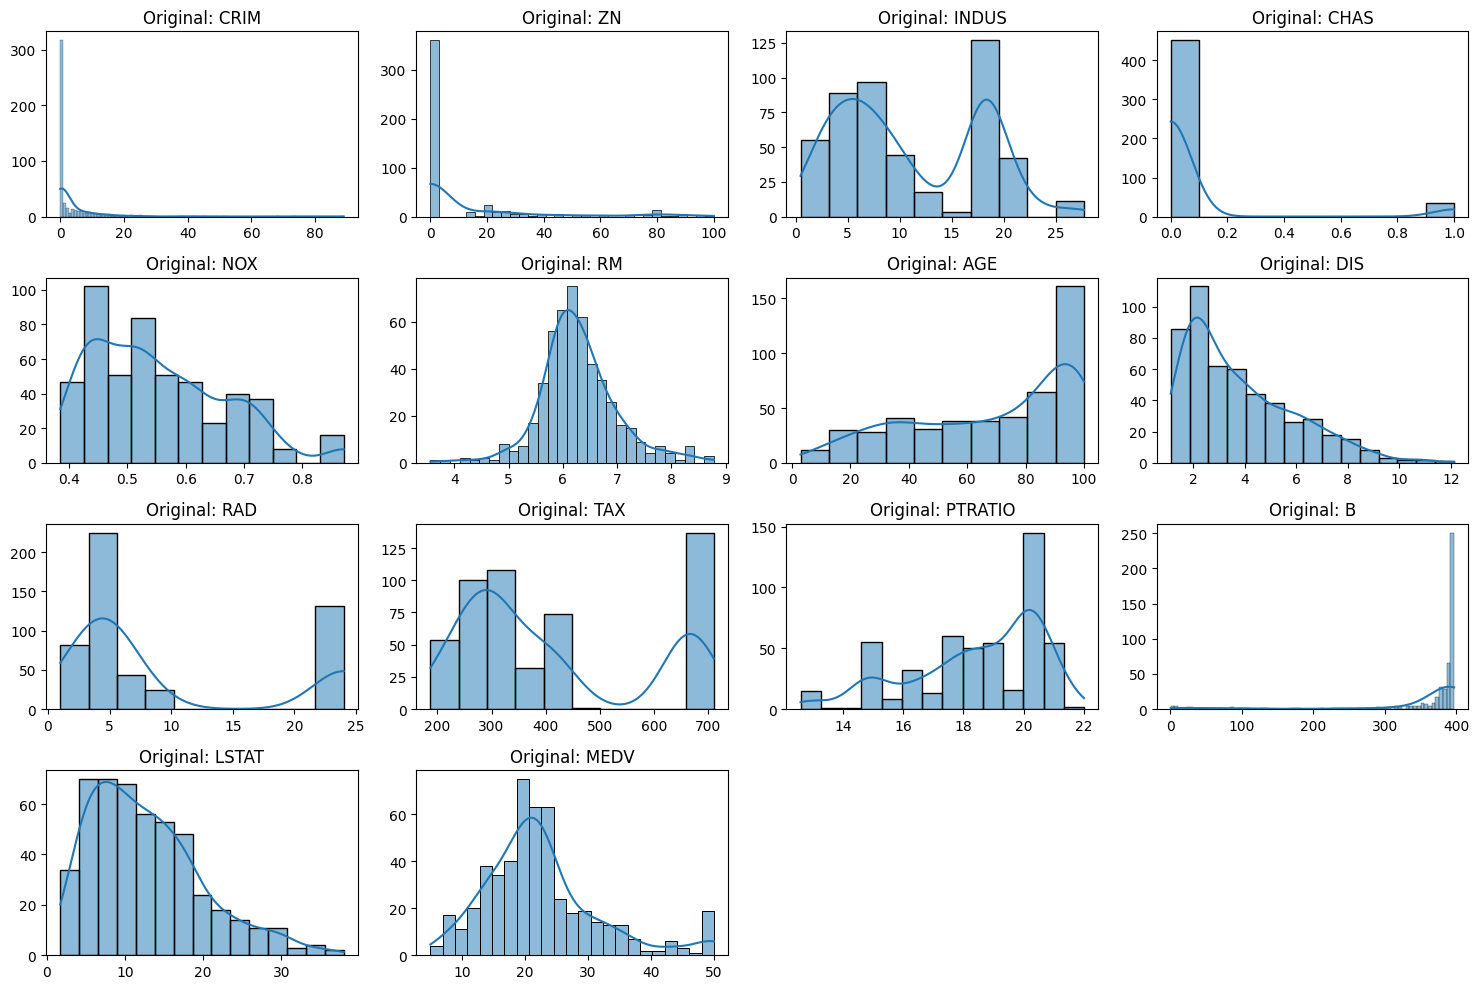

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)  
    sns.histplot(df[column], kde=True)
    plt.title(f'Original: {column}')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [7]:
def impute_missing_values(df):
    for column in df.columns:
        if df[column].isnull().sum() > 0:
         
            column_skewness = skew(df[column].dropna())
            strategy = 'median' if abs(column_skewness) > 0.5 else 'mean'
            
           
            imputer = SimpleImputer(strategy=strategy)
            df[column] = imputer.fit_transform(df[[column]])
    
    return df


In [8]:
df = impute_missing_values(df)

In [9]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [10]:
for column in df.columns:
    if df[column].dtype != 'object': 
        column_skewness = skew(df[column].dropna())
        print(f'{column}: Skewness = {column_skewness}')

CRIM: Skewness = 5.300336344123137
ZN: Skewness = 2.3177057061337867
INDUS: Skewness = 0.3089512813504196
CHAS: Skewness = 3.4575116542799327
NOX: Skewness = 0.7271441597740319
RM: Skewness = 0.40241466802496245
AGE: Skewness = -0.6241107901651556
DIS: Skewness = 1.0087787565152246
RAD: Skewness = 1.0018334924536951
TAX: Skewness = 0.6679682687237768
PTRATIO: Skewness = -0.7999445320367449
B: Skewness = -2.8817983452627716
LSTAT: Skewness = 0.9442698199768395
MEDV: Skewness = 1.104810822864635


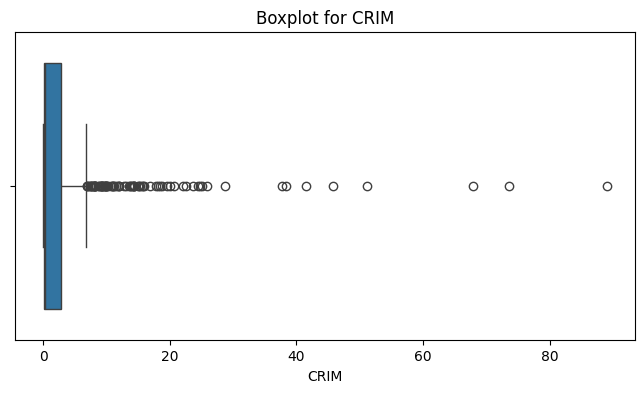

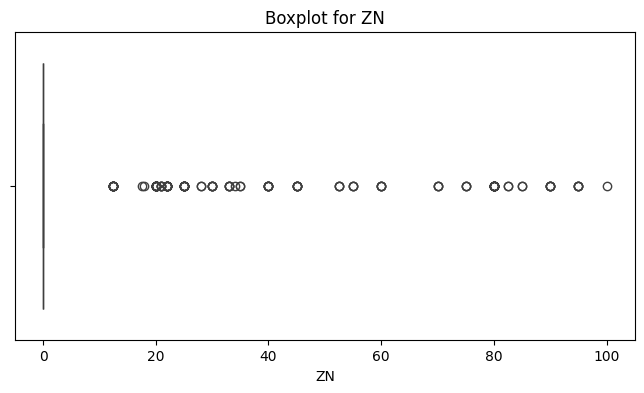

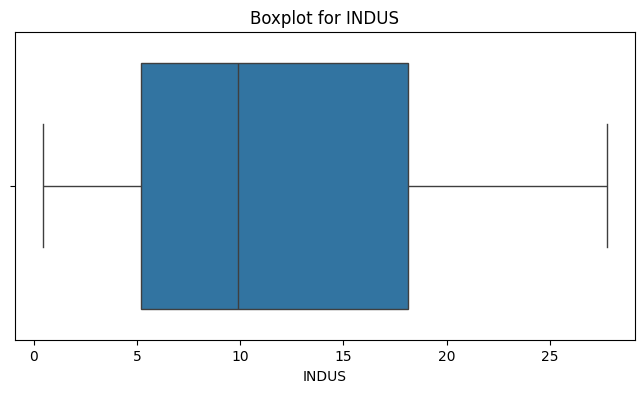

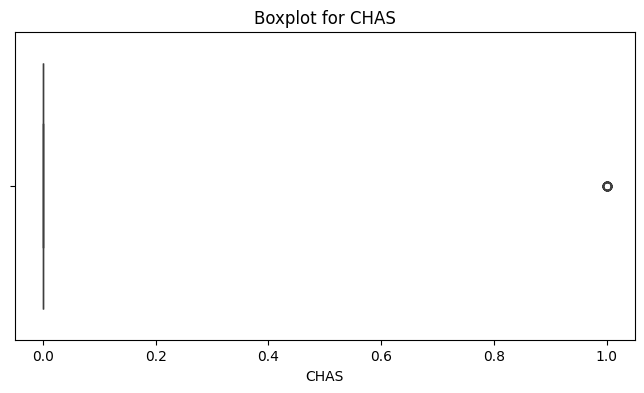

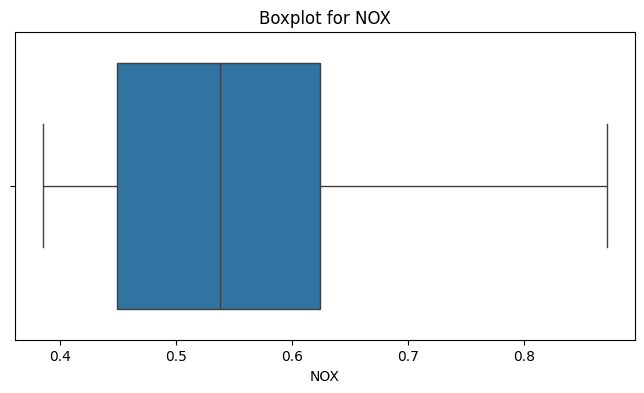

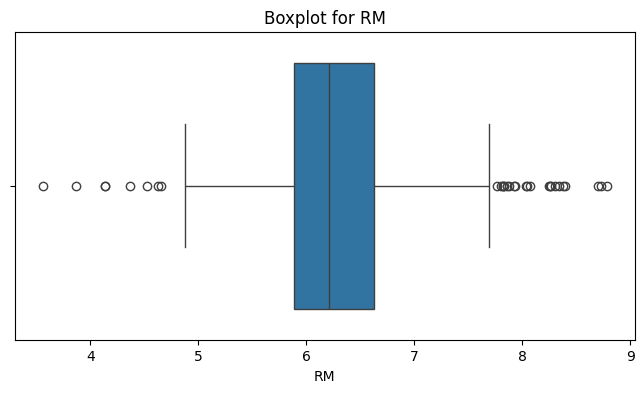

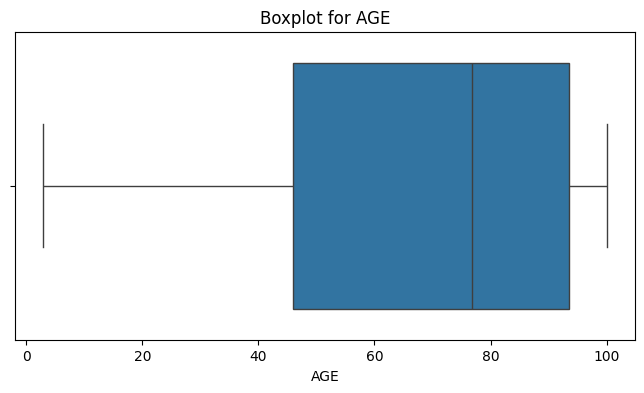

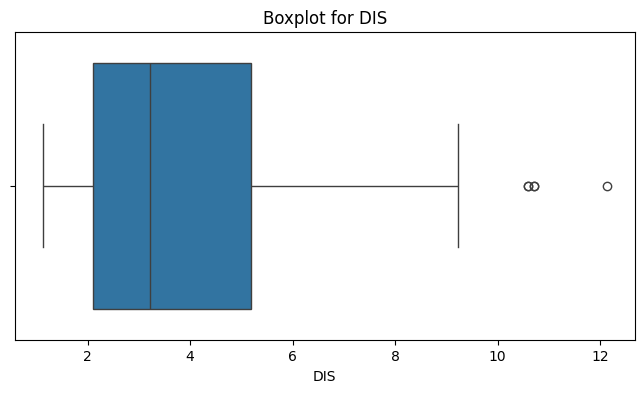

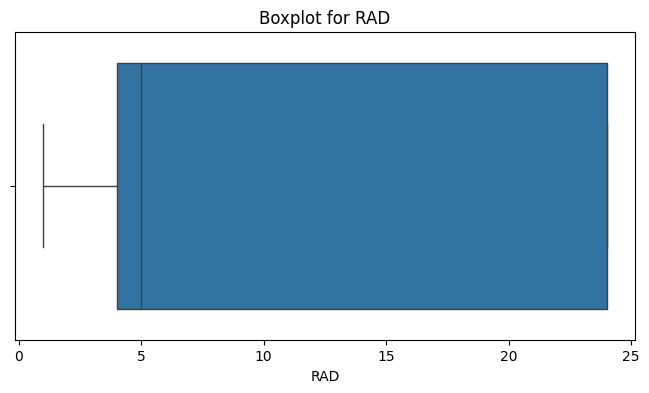

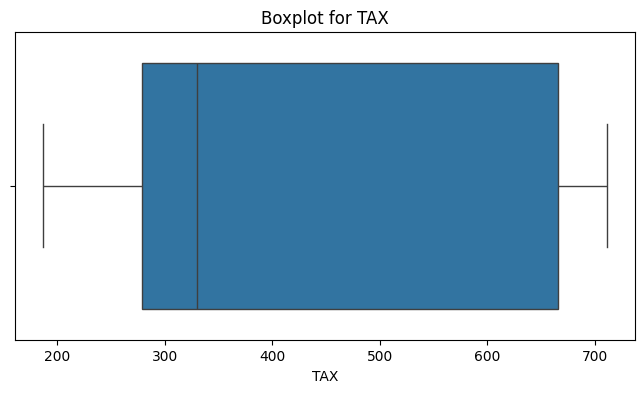

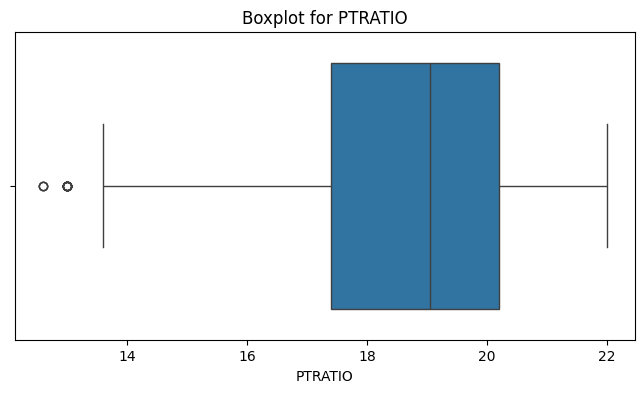

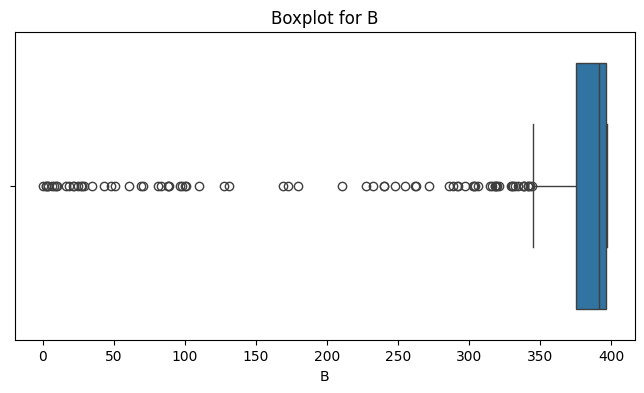

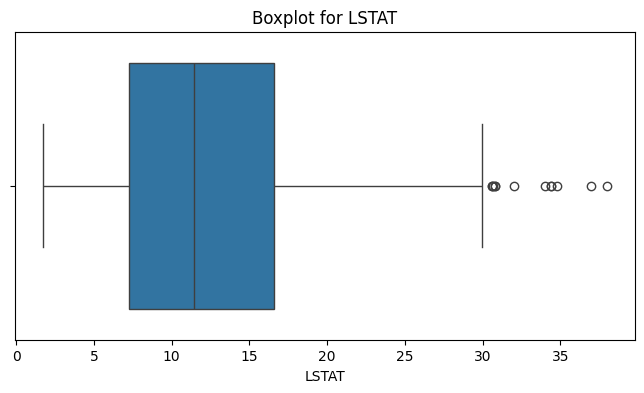

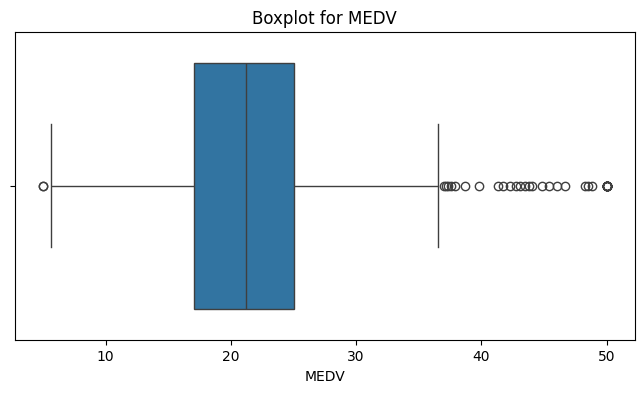

In [11]:
for column in df.columns:
    if df[column].dtype != 'object':  
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

In [12]:
for column in df.columns:
    if df[column].dtype != 'object':
        column_skewness = skew(df[column].dropna()) 
        if abs(column_skewness) < 0.5: 
            df['z_scores'] = zscore(df[column].dropna())
            df = df[(df['z_scores'] < 3) & (df['z_scores'] > -3)]
            print(f'Removed outliers using Z-score for {column}')

Removed outliers using Z-score for INDUS
Removed outliers using Z-score for RM


In [13]:
for column in df.columns:
    if df[column].dtype != 'object':
        column_skewness = skew(df[column].dropna())  
        if abs(column_skewness) > 0.5: 
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
            print(f'Removed outliers using IQR for {column}')

Removed outliers using IQR for CRIM
Removed outliers using IQR for ZN
Removed outliers using IQR for INDUS
Removed outliers using IQR for CHAS
Removed outliers using IQR for NOX
Removed outliers using IQR for RM
Removed outliers using IQR for AGE
Removed outliers using IQR for DIS
Removed outliers using IQR for RAD
Removed outliers using IQR for TAX
Removed outliers using IQR for PTRATIO
Removed outliers using IQR for B
Removed outliers using IQR for LSTAT
Removed outliers using IQR for MEDV
Removed outliers using IQR for z_scores


In [14]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())


       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.793337  1.001359 -1.274177   0.0  0.668111  1.058588  0.190855 -0.197791   
1 -0.718954 -0.543386 -0.342965   0.0 -0.520286  0.625591  0.716890  0.300806   
2 -0.709953 -0.543386 -1.299609   0.0 -0.709740  0.650896 -0.058723  0.923328   
3 -0.502856  0.529354 -0.186459   0.0  0.426987 -0.524384  0.244611  0.638131   
4 -0.303485  0.529354 -0.186459   0.0  0.426987 -0.074516  1.377314  0.859831   

        RAD       TAX   PTRATIO         B     LSTAT  z_scores  
0 -2.204154 -0.223569 -2.051604  0.804824 -1.439143  1.058588  
1 -1.574822 -1.048755 -0.545800  0.804824 -0.400796  0.625591  
2 -0.945490 -1.354380 -0.003711  0.384883 -1.381734  0.650896  
3  0.313175  0.005649 -2.111836  0.608449  0.420397 -0.524384  
4  0.313175  0.005649 -2.111836  0.804824  2.097728 -0.074516  


In [15]:
from sklearn.preprocessing import MinMaxScaler


minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)

X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)


print(X_minmax_scaled_df.head())


       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.400000  0.043443   0.0  0.600000  0.668359  0.641607  0.320533   
1  0.009387  0.000000  0.238525   0.0  0.279070  0.581500  0.782698  0.436639   
2  0.010523  0.000000  0.038115   0.0  0.227907  0.586576  0.574665  0.581603   
3  0.036659  0.277778  0.271311   0.0  0.534884  0.350818  0.656025  0.515190   
4  0.061819  0.277778  0.271311   0.0  0.534884  0.441060  0.959835  0.566816   

        RAD       TAX   PTRATIO         B     LSTAT  z_scores  
0  0.000000  0.433735  0.092308  1.000000  0.109051  0.668359  
1  0.142857  0.216867  0.476923  1.000000  0.335878  0.581500  
2  0.285714  0.136546  0.615385  0.887994  0.121592  0.586576  
3  0.571429  0.493976  0.076923  0.947623  0.515267  0.350818  
4  0.571429  0.493976  0.076923  1.000000  0.881679  0.441060  


# Simple Linear Regresion 

In [16]:
X_rm = df[['RM']]  
X_rm_scaled = scaler.fit_transform(X_rm)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

LinearRegression()

In [19]:
predictions_simple = simple_model.predict(X_test)

In [20]:
mse_simple = mean_squared_error(y_test, predictions_simple)
r2_simple = r2_score(y_test, predictions_simple)

print(f'Simple Linear Regression - Mean Squared Error: {mse_simple}')
print(f'Simple Linear Regression - R^2 Score: {r2_simple}')

Simple Linear Regression - Mean Squared Error: 3.876572139099421
Simple Linear Regression - R^2 Score: 0.6159572329436622


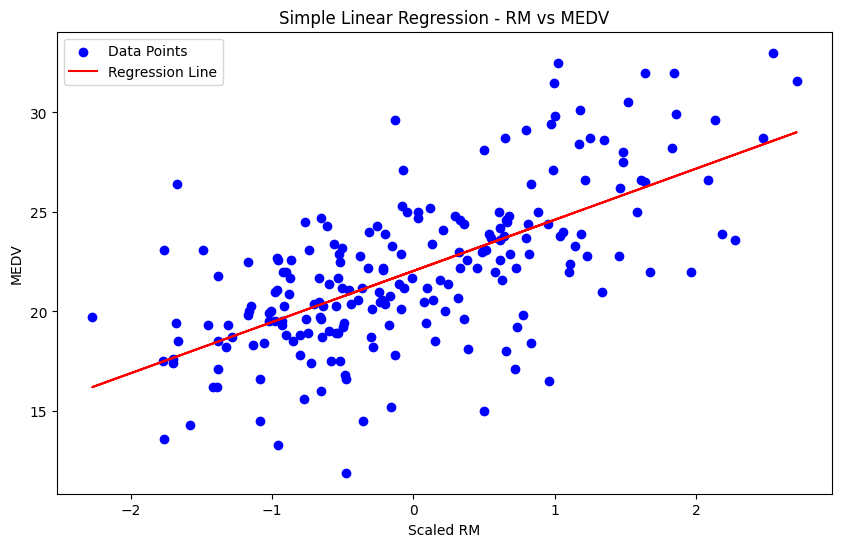

In [21]:
X_rm = df[['RM']]
y = df['MEDV']

scaler = StandardScaler()
X_rm_scaled = scaler.fit_transform(X_rm) 
simple_model = LinearRegression()
simple_model.fit(X_rm_scaled, y) 

plt.figure(figsize=(10, 6))
plt.scatter(X_rm_scaled, y, color='blue', label='Data Points')  
predictions_simple = simple_model.predict(X_rm_scaled)

plt.plot(X_rm_scaled, predictions_simple, color='red', label='Regression Line') 
plt.title('Simple Linear Regression - RM vs MEDV') 
plt.xlabel('Scaled RM')  
plt.ylabel('MEDV')  
plt.legend()  
plt.show() 


# Step 6: Fit a Multilinear Regression Model


In [22]:
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)


LinearRegression()

In [23]:
predictions_multi = multi_model.predict(X_test)


In [24]:
mse_multi = mean_squared_error(y_test, predictions_multi)
r2_multi = r2_score(y_test, predictions_multi)

print(f'Multilinear Regression - Mean Squared Error: {mse_multi}')
print(f'Multilinear Regression - R^2 Score: {r2_multi}')

Multilinear Regression - Mean Squared Error: 3.876572139099421
Multilinear Regression - R^2 Score: 0.6159572329436622


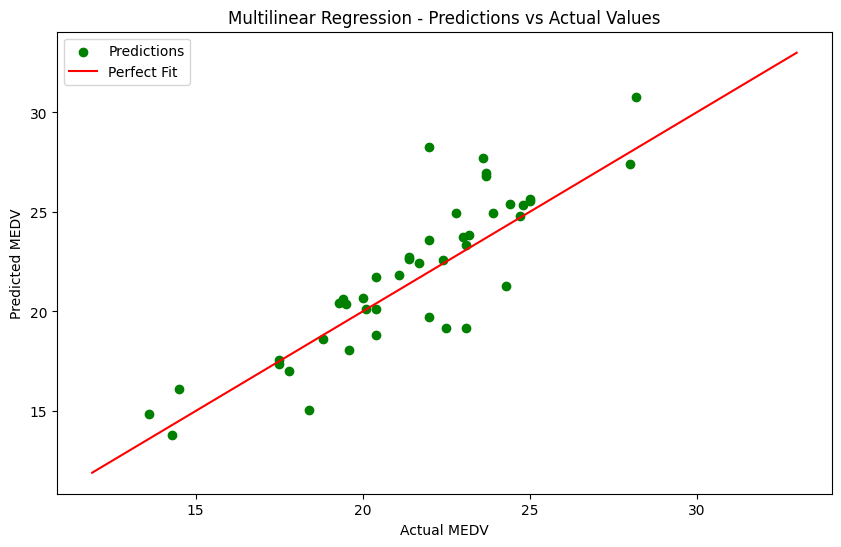

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_multi, color='green', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', label='Perfect Fit')  
plt.title('Multilinear Regression - Predictions vs Actual Values')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.legend()
plt.show()